![](https://m.economictimes.com/thumb/msid-69278711,width-1200,height-900,resizemode-4,imgsize-132321/home-insurance-getty.jpg)
# Introduction 
This is my first ML practice building a linear regression model. 
In this dataset, we will perform an exploratory data analysis to understand correlation before building our model.


## Importing required packages 

In [1]:
# Importing required packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving insurance.csv to insurance.csv


## Importing dataset and create an overview of dataset

In [5]:
def overview():
    '''
    Read a comma-separated values (csv) file into DataFrame.
    Print 5 rows of data
    Print number of rows and columns
    Print datatype for each column
    Print number of NULL/NaN values for each column
    Print summary data
    
    Return:
    data, rtype: DataFrame
    '''
    data = pd.read_csv('insurance.csv')
    print("The first 5 rows if data are:\n", data.head())
    print("\n")
    print("The (Row,Column) is:\n", data.shape)
    print("\n")
    print("Data type of each column:\n", data.dtypes)
    print("\n")
    print("The number of null values in each column are:\n", data.isnull().sum())
    print("\n")
    print("Numeric summary:\n", data.describe())
    return data

df = overview()

The first 5 rows if data are:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The (Row,Column) is:
 (1338, 7)


Data type of each column:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


The number of null values in each column are:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Numeric summary:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14

## Assigning numerical and categorical variables 

In [0]:
# Sorting out numerical and categorical variables 
def categorical_variable(df):
    return list(df.select_dtypes(include = ['category', 'object']))

def numerical_variable(df):
    return list(df.select_dtypes(exclude = ['category', 'object']))


## Performing EDA 

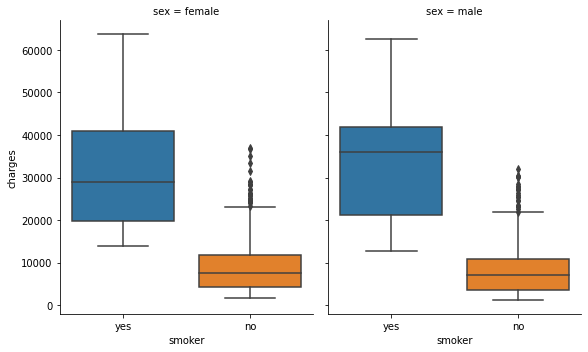

In [7]:
g = sns.catplot(x="smoker", y="charges",col_wrap=3, col="sex",data= df, kind="box",height=5, aspect=0.8);

We can see that smokers have higher charges due to the possible health issues gathered from smoking. Let's see the rate of charges among different age.

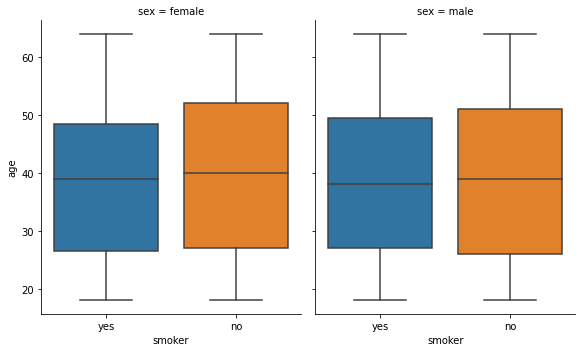

In [8]:
g = sns.catplot(x="smoker", y="age",col_wrap=3, col="sex",data= df, kind="box",height=5, aspect=0.8);

It seems that there are more male smokers as compared to female. Could that be the reason why the charges for male smokers are higher?

## Changing categorical values to numeric 
- This is an important step as many machine learning algorithms are unable to support categorical values. 
- There are 2 ways we can deal with this:
    - Label encoding
    - One-hot encoding

### Label encoding (Ordinal values)
Label encoding assigns each unique value to a different integer.
![](https://i.imgur.com/tEogUAr.png)
- This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

- This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

### One-hot encoding 
- One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.
![](https://i.imgur.com/TW5m0aJ.png)
- In the original dataset, "Color" is a categorical variable with three categories: "Red", "Yellow", and "Green". The corresponding one-hot encoding contains one column for each possible value, and one row for each row in the original dataset. Wherever the original value was "Red", we put a 1 in the "Red" column; if the original value was "Yellow", we put a 1 in the "Yellow" column, and so on.

- In contrast to label encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as nominal variables.

- One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).

In [0]:
# Changing categorical values to numeric
df2 = df.copy()
#sex
le = LabelEncoder()
le.fit(df2.sex.drop_duplicates()) 
df2.sex = le.transform(df2.sex)
# smoker or not
le.fit(df2.smoker.drop_duplicates()) 
df2.smoker = le.transform(df2.smoker)
#region
le.fit(df2.region.drop_duplicates()) 
df2.region = le.transform(df2.region)

## Measuring correlation
Given that some variables here are categorical data, we will need to use 1-way ANOVA test to calculate correlation.

We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
The null hypothesis is that they are independent.
The alternative hypothesis is that they are correlated in some way.

In [10]:
print(df2.corr()['charges'])

lm = ols('sex ~ charges', data = df2).fit()
table = sm.stats.anova_lm(lm)
print("P-value for 1-way ANOVA test between sex and charges is: ",table.loc['charges','PR(>F)'])
lm1 = ols('smoker ~ charges', data = df2).fit()
table1 = sm.stats.anova_lm(lm1)
print("P-value for 1-way ANOVA test between smoker and charges is: ",table1.loc['charges','PR(>F)'])
lm2 = ols('region ~ charges', data = df2).fit()
table2 = sm.stats.anova_lm(lm2)
print("P-value for 1-way ANOVA test between region and charges is: ",table2.loc['charges','PR(>F)'])

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64
P-value for 1-way ANOVA test between sex and charges is:  0.03613272100596256
P-value for 1-way ANOVA test between smoker and charges is:  8.271435842181086e-283
P-value for 1-way ANOVA test between region and charges is:  0.8205178364652657


- Here, you can see me perform a Pearson correlation test and a 1-way ANOVA test. 1-way AVOVA test is the right way to test correlation between a categorical and numerical data.
- It seems that the smoker variable is highly correlated to charges. Hence, we will not drop this feature at the later step.
- It seems that region has a P-value of > 0.05, hence, we accept the null hypothesis that they are independent.

## Performing a linear regression
- This time, we include all features in X

In [11]:
# Creating training and testing dataset
y = df2['charges']
X = df2.drop(['charges'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.7833463107364539


78.3% accuracy! Not that bad for the first model! Let's see if we can improve it by removing non-correlated features.

In [12]:
# Creating training and testing dataset
y = df2['charges']
X = df2.drop(['charges', 'region'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.7811302113434095


78.1%.. A slight improvement! Now let's try using Polynomial regression!

## Polynomial regression
- A form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.
- Why polynomial regression? An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

In [13]:
# Creating training and testing dataset
y = df2['charges']
X = df2.drop(['charges', 'region'], axis = 1)

poly_reg  = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.20, random_state = 42)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,y_train)

print(lin_reg.score(X_test,y_test))

0.8669441556658781


Sweet! We see a huge improvement in the score! I believe more can be done to improve this model by performing feature selections and testing more complex models but since this is my first model, I shall end off here! Thank you for reading!